In [5]:
from IPython.display import Image
import os
import pandas as pd
from io import StringIO
import sys
import matplotlib.pyplot as plt
import torch
from torch import nn


In [6]:
if torch.cuda.is_available():
    print("CUDA is available!")
else:
    print("CUDA is available!")

CUDA is available!


In [7]:
log_file_path = 'D:/GNR638_assign/training_logs_nunu.txt'  # Change the path as needed

log_file = open(log_file_path, 'w')

# Redirect stdout to the log file
sys.stdout = log_file

In [8]:
checkpoint_path = 'D:/GNR638_assign/model_checkpoint2.pth' 

In [9]:
from IPython.display import Image
import os
import pandas as pd
from io import StringIO
import sys

In [11]:
with open('D:/GNR638_assign/CUB_200_2011/images.txt', 'r') as f:
  images_text = f.read()

with open('D:/GNR638_assign/CUB_200_2011/train_test_split.txt', 'r') as f:
  train_test = f.read()

with open('D:/GNR638_assign/CUB_200_2011/image_class_labels.txt', 'r') as f:
  labels_text = f.read()

In [12]:
data_labels=pd.read_csv(StringIO(labels_text), sep=' ', header=None, names=['Number', 'Data'])
data_images=pd.read_csv(StringIO(images_text), sep=' ', header=None, names=['Number', 'Data'])
data_split=pd.read_csv(StringIO(train_test), sep=' ', header=None, names=['Number', 'Data'])

data_labels_column=data_labels['Data']
data_images_column=data_images['Data']
data_split_column=data_split['Data']

df=pd.DataFrame({
    'images':data_images_column,
    'labels': data_labels_column-1,
    'is_train': data_split_column
})

In [13]:
df

,images,labels,is_train
0,001.Black_footed_Albatross/Black_Footed_Albatr...,0,0
1,001.Black_footed_Albatross/Black_Footed_Albatr...,0,1
2,001.Black_footed_Albatross/Black_Footed_Albatr...,0,0
3,001.Black_footed_Albatross/Black_Footed_Albatr...,0,1
4,001.Black_footed_Albatross/Black_Footed_Albatr...,0,1
...,...,...,...
11783,200.Common_Yellowthroat/Common_Yellowthroat_00...,199,1
11784,200.Common_Yellowthroat/Common_Yellowthroat_00...,199,0
11785,200.Common_Yellowthroat/Common_Yellowthroat_00...,199,0
11786,200.Common_Yellowthroat/Common_Yellowthroat_00...,199,1


In [14]:
df = df.sample(frac=1).reset_index(drop=True)

In [15]:
df

,images,labels,is_train
0,039.Least_Flycatcher/Least_Flycatcher_0082_301...,38,1
1,176.Prairie_Warbler/Prairie_Warbler_0109_17290...,175,1
2,010.Red_winged_Blackbird/Red_Winged_Blackbird_...,9,1
3,103.Sayornis/Sayornis_0070_99354.jpg,102,1
4,060.Glaucous_winged_Gull/Glaucous_Winged_Gull_...,59,0
...,...,...,...
11783,060.Glaucous_winged_Gull/Glaucous_Winged_Gull_...,59,0
11784,144.Common_Tern/Common_Tern_0054_148028.jpg,143,1
11785,087.Mallard/Mallard_0038_76902.jpg,86,0
11786,199.Winter_Wren/Winter_Wren_0033_189635.jpg,198,1


In [16]:
dir_path='D:/GNR638_assign/CUB_200_2011/images'

In [17]:
df_train = df[df['is_train']==1]
df_test = df[df['is_train']==0]

In [18]:
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
from torch import nn

import torchvision
import torch.optim as optim
import torch.nn.functional as F
from tqdm import tqdm
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [19]:
device

device(type='cuda')

In [20]:

class CustomImageDataset(Dataset):
    def __init__(self, data_list, transform=None):
        self.data_list = data_list
        self.transform = transform

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        img_path, label = self.data_list[idx]
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, label

In [21]:
train_data_list = []

for index, row in df_train.iterrows():
    # Assuming 'images' column contains the relative paths
    image_path = os.path.join(dir_path, row['images'])
    label = row['labels']
    train_data_list.append((image_path, label))

test_data_list = []

for index, row in df_test.iterrows():
    # Assuming 'images' column contains the relative paths
    image_path = os.path.join(dir_path, row['images'])
    label = row['labels']
    test_data_list.append((image_path, label))

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(240),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.5,0.5, 0.5]),
])
# Create datasets using CustomImageDataset
train_dataset = CustomImageDataset(data_list=train_data_list, transform=transform)
test_dataset = CustomImageDataset(data_list=test_data_list, transform=transform)

# Create DataLoader for training and testing
batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [22]:
from torchvision.models import efficientnet

In [23]:
my_model=torchvision.models.efficientnet_b1(weights='IMAGENET1K_V1')

In [24]:


new_linear_layer = nn.Linear(in_features=1000, out_features=200)

# Modify the classifier to include the new linear layer
my_model.classifier.add_module('2', new_linear_layer)


In [25]:
# my_model = my_model()

my_model.to(device)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [26]:
from torchsummary import summary
summary(my_model, (3, 240, 240))

In [27]:
# Hyperparameters
num_classes = 200
learning_rate = 1e-2
batch_size = 32
num_epochs = 8


In [28]:
criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

# Set the model to training mode
my_model.train()
# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(my_model.parameters(), lr=0.01, weight_decay=0.001, momentum=0.9)

In [29]:
losses_per_epoch = []
accuracies_per_epoch = []

# Train Network
for epoch in range(num_epochs):
    losses = []
    correct_predictions = 0
    total_samples = 0

    for batch_idx, (data, targets) in enumerate(tqdm(train_dataloader)):

        data = data.to(device=device)
        targets = targets.to(device=device)

        scores =my_model(data)

        loss = criterion(scores, targets)

        losses.append(loss.item())
        # backward
        optimizer_ft.zero_grad()
        loss.backward()


        optimizer_ft.step()


        _, predicted_labels = torch.max(scores, 1)
        correct_predictions += (predicted_labels == targets).sum().item()
        total_samples += targets.size(0)
        
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': my_model.state_dict(),
        'optimizer_state_dict': optimizer_ft.state_dict(),
        'loss': loss,  
    }
    torch.save(checkpoint, checkpoint_path)
    
    # Calculate loss and accuracy for the epoch
    epoch_loss = sum(losses) / len(losses)
    epoch_accuracy = correct_predictions / total_samples

    # Append values to the lists
    losses_per_epoch.append(epoch_loss)
    accuracies_per_epoch.append(epoch_accuracy)

    print(f"Cost at epoch {epoch} is {sum(losses)/len(losses):.5f}")




100%|████████████████████████████████████████████████████████████████████████████████| 188/188 [01:22<00:00,  2.29it/s]


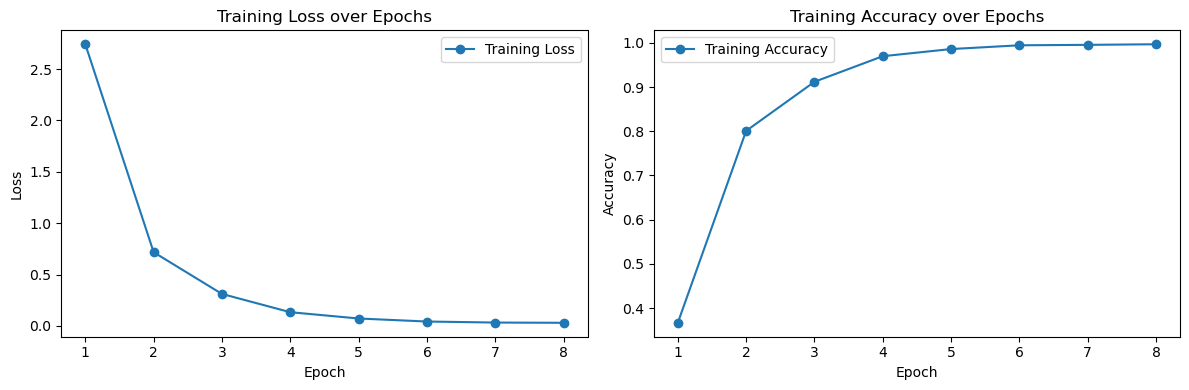

In [30]:
import numpy as np
# Plotting loss and accuracy
epochs = np.arange(1, num_epochs + 1)

# Plot Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, losses_per_epoch, label='Training Loss', marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracies_per_epoch, label='Training Accuracy', marker='o')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [31]:


def check_accuracy(loader, my_model):
  
    num_correct = 0
    num_samples = 0
    my_model.eval()

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)

            scores = my_model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

        print(
            f"Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}"
        )

    my_model.train()

In [32]:
check_accuracy(train_dataloader, my_model)

In [33]:
check_accuracy(test_dataloader, my_model)

In [34]:
log_file.close()

# Restore the original stdout
sys.stdout = sys.__stdout__
